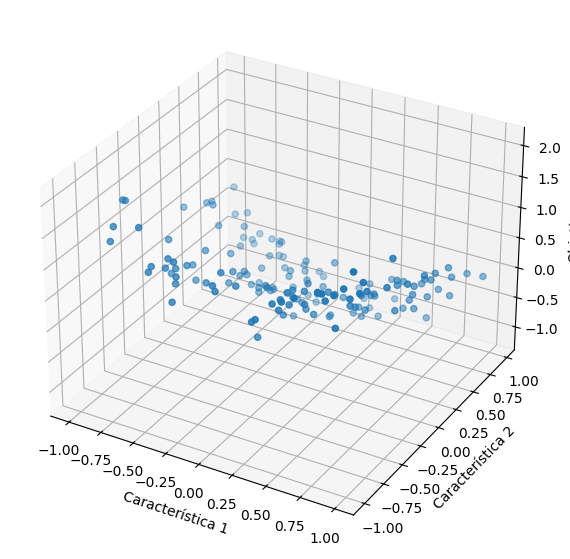

In [1]:
#id:7-7--7 

import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split  


#Cargamos los datos del archivo: week3

data = pd.read_csv('C:/Users/HP/Documents/ASIGNACIÓN 2 INTRODUCCION A CIENCIA DE DATOS/week3.csv')

X = data.iloc[:, :2].values  # Seleccionamos las dos primeras columnas como nuestras características
Y = data.iloc[:, 2].values   # Seleccionamos la tercera columna como la Variable Objetivo

#Como nos piden ver la tendencia de los datos de entrenamiento, dividimos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Graficamos los datos de entrenamiento en un gráfico de dispersión 3D
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], Y_train)

ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Objetivo')

plt.show()



In [4]:
#Características Polinómicas Adicionales

from sklearn.preprocessing import PolynomialFeatures #Utilizaremos la función PolynomialFeatures de sklearn 

# Usamos PolynomialFeatures para generar características hasta grado 5
poly = PolynomialFeatures(degree=5)

# Definimos cuales son nuestras características en el dataframe
X = data[['X1', 'X2']]

# Transformamos X, para así poder generar y agregar las características polinómicas
X_poly = poly.fit_transform(X)

# Imprimimos nuestras nuevas características polinómicas
print(f"Características polinómicas:\n{poly.get_feature_names_out(['X1', 'X2'])}\n")
print(X_poly[:5])  # Mostramos las primeras cinco filas



Características polinómicas:
['1' 'X1' 'X2' 'X1^2' 'X1 X2' 'X2^2' 'X1^3' 'X1^2 X2' 'X1 X2^2' 'X2^3'
 'X1^4' 'X1^3 X2' 'X1^2 X2^2' 'X1 X2^3' 'X2^4' 'X1^5' 'X1^4 X2'
 'X1^3 X2^2' 'X1^2 X2^3' 'X1 X2^4' 'X2^5']

[[ 1.00000000e+00  9.00000000e-01  5.90000000e-01  8.10000000e-01
   5.31000000e-01  3.48100000e-01  7.29000000e-01  4.77900000e-01
   3.13290000e-01  2.05379000e-01  6.56100000e-01  4.30110000e-01
   2.81961000e-01  1.84841100e-01  1.21173610e-01  5.90490000e-01
   3.87099000e-01  2.53764900e-01  1.66356990e-01  1.09056249e-01
   7.14924299e-02]
 [ 1.00000000e+00 -4.00000000e-01 -1.00000000e-01  1.60000000e-01
   4.00000000e-02  1.00000000e-02 -6.40000000e-02 -1.60000000e-02
  -4.00000000e-03 -1.00000000e-03  2.56000000e-02  6.40000000e-03
   1.60000000e-03  4.00000000e-04  1.00000000e-04 -1.02400000e-02
  -2.56000000e-03 -6.40000000e-04 -1.60000000e-04 -4.00000000e-05
  -1.00000000e-05]
 [ 1.00000000e+00  3.40000000e-01 -3.80000000e-01  1.15600000e-01
  -1.29200000e-01  1.4440000

In [5]:
print(f"Original columns: {X.shape[1]}, New columns: {X_poly.shape[1]}")

Original columns: 2, New columns: 21


In [6]:
#Entrenamos el modelo de regresión Lasso con estas características y varios valores de C

from sklearn.linear_model import Lasso

#Definimos nuestro rango de valores de C
#Quise iniciar con valores muy bajos de C y los fui aumentando poco a poco
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

#Para trabajar el modelo de regresión Lasso, debemos convertir los valores de C a alpha (alpha = 1/C)

alpha_values = [1/c for c in C_values]

#Para los modelos de regresión de Lasso, el valor C y el valor de alpha (α) son inversamente proporcionales.
#Entonces, si C disminuye, α aumenta, y si C aumenta, α disminuye.

# Entrenamos un modelo para cada valor de C
for alpha, C in zip(alpha_values, C_values):

    # Creamos el modelo Lasso con el valor de alpha correspondiente
    model = Lasso(alpha=alpha, max_iter=10000)  
    # Con max_iter ajustamos el número máximo de iteraciones a 10,000.
    #De esta manera, nos aseguramos que el algoritmo tenga suficiente tiempo para encontrar la mejor solución
    
    # Entrenamos el modelo con las características polinómicas y la variable objetivo
    model.fit(X_poly, data['Y'])
    
    # Imprimimos los coeficientes que obtuvimos para el modelo
    print(f"\nResultados para C = {C} (alpha = {alpha}):")
    for coef, feature in zip(model.coef_, poly.get_feature_names_out()):
        print(f"{feature}: {coef}")



Resultados para C = 0.0001 (alpha = 10000.0):
1: 0.0
X1: 0.0
X2: -0.0
X1^2: 0.0
X1 X2: -0.0
X2^2: 0.0
X1^3: 0.0
X1^2 X2: -0.0
X1 X2^2: 0.0
X2^3: -0.0
X1^4: 0.0
X1^3 X2: -0.0
X1^2 X2^2: 0.0
X1 X2^3: -0.0
X2^4: 0.0
X1^5: 0.0
X1^4 X2: -0.0
X1^3 X2^2: 0.0
X1^2 X2^3: -0.0
X1 X2^4: 0.0
X2^5: -0.0

Resultados para C = 0.001 (alpha = 1000.0):
1: 0.0
X1: 0.0
X2: -0.0
X1^2: 0.0
X1 X2: -0.0
X2^2: 0.0
X1^3: 0.0
X1^2 X2: -0.0
X1 X2^2: 0.0
X2^3: -0.0
X1^4: 0.0
X1^3 X2: -0.0
X1^2 X2^2: 0.0
X1 X2^3: -0.0
X2^4: 0.0
X1^5: 0.0
X1^4 X2: -0.0
X1^3 X2^2: 0.0
X1^2 X2^3: -0.0
X1 X2^4: 0.0
X2^5: -0.0

Resultados para C = 0.01 (alpha = 100.0):
1: 0.0
X1: 0.0
X2: -0.0
X1^2: 0.0
X1 X2: -0.0
X2^2: 0.0
X1^3: 0.0
X1^2 X2: -0.0
X1 X2^2: 0.0
X2^3: -0.0
X1^4: 0.0
X1^3 X2: -0.0
X1^2 X2^2: 0.0
X1 X2^3: -0.0
X2^4: 0.0
X1^5: 0.0
X1^4 X2: -0.0
X1^3 X2^2: 0.0
X1^2 X2^3: -0.0
X1 X2^4: 0.0
X2^5: -0.0

Resultados para C = 0.1 (alpha = 10.0):
1: 0.0
X1: 0.0
X2: -0.0
X1^2: 0.0
X1 X2: -0.0
X2^2: 0.0
X1^3: 0.0
X1^2 X2: -0.0
X1 X2^

In [10]:
import numpy as np

#Primero, creamos un conjunto de 50 valores entre -5 y 5. 
#Usamos el rango de -5 a 5 para cubrir los posibles valores de las características.
grid = np.linspace(-5, 5, 50)

X_test = [] 
# Creamos una lista vacía donde vamos a almacenar todas las combinaciones de los valores de las características.

#Generamos dos bucles: El primero toma un valor i del conjunto de datos grid. El segundo, toma un valor j.
for i in grid:
    for j in grid:
        X_test.append([i, j]) 
        #Cada par de valores (i, j), los colocamos juntos en una lista [i, j] y los añadimos a X_test usando append().

X_test = np.array(X_test)
#Convertimos la lista X_test en un arreglo de numpy usando np.array(), para poder hacer predicciones usando los valores de la lista.

#Veamos las primeras 5 filas de la cuadrícula
print(X_test[:5])

[[-5.         -5.        ]
 [-5.         -4.79591837]
 [-5.         -4.59183673]
 [-5.         -4.3877551 ]
 [-5.         -4.18367347]]


In [15]:
#GENERAR CARACTERISTICAS POLINOMICAS PARA LA CUADRICULA

# Generamos las características polinómicas para el conjunto X_test
poly = PolynomialFeatures(degree=5)
Xtest_poly = poly.fit_transform(X_test)

# Obtenemos los nombres de las características polinómicas generadas por PolynomialFeatures
feature_names = poly.get_feature_names_out(['X1', 'X2'])

# Creamos el DataFrame usando los nombres de las características polinómicas
Xtest_poly_df = pd.DataFrame(Xtest_poly, columns=feature_names)

# Mostramos las primeras filas del DataFrame resultante
print(Xtest_poly_df.head())

     1   X1        X2  X1^2      X1 X2       X2^2   X1^3     X1^2 X2  \
0  1.0 -5.0 -5.000000  25.0  25.000000  25.000000 -125.0 -125.000000   
1  1.0 -5.0 -4.795918  25.0  23.979592  23.000833 -125.0 -119.897959   
2  1.0 -5.0 -4.591837  25.0  22.959184  21.084965 -125.0 -114.795918   
3  1.0 -5.0 -4.387755  25.0  21.938776  19.252395 -125.0 -109.693878   
4  1.0 -5.0 -4.183673  25.0  20.918367  17.503124 -125.0 -104.591837   

      X1 X2^2        X2^3  ...     X1^3 X2   X1^2 X2^2     X1 X2^3  \
0 -125.000000 -125.000000  ...  625.000000  625.000000  625.000000   
1 -115.004165 -110.310117  ...  599.489796  575.020825  551.550587   
2 -105.424823  -96.818715  ...  573.979592  527.124115  484.093575   
3  -96.261974  -84.474794  ...  548.469388  481.309871  422.373968   
4  -87.515618  -73.227354  ...  522.959184  437.578092  366.136771   

         X2^4    X1^5      X1^4 X2    X1^3 X2^2    X1^2 X2^3      X1 X2^4  \
0  625.000000 -3125.0 -3125.000000 -3125.000000 -3125.000000 -3125.00

In [19]:
# PREDICCIONES

# Anteriormente, se generaron varios modelos, utilizando diferentes valores de C. 
# Vamos a generar las predicciones para los modelos donde C=1, C=10, C=100 y C=1000

C_values = [1, 10, 100, 1000]

# Convertimos los valores de C a alpha
alpha_values = [1/c for c in C_values]

# Aquí almacenamos las predicciones
predictions = {}

# Obtenemos los nombres de las características polinómicas
feature_names = poly.get_feature_names_out(['X1', 'X2'])

# Convertimos X_poly a un DataFrame, usando los nombres de las características
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Creamos un modelo Lasso para cada valor de C
for alpha, C in zip(alpha_values, C_values):
    
    # Creamos el modelo Lasso
    model = Lasso(alpha=alpha, max_iter=10000)
    
    # Entrenamos cada modelo con las características polinómicas y la variable objetivo
    model.fit(X_poly_df, data['Y'])
    
    # Realizamos predicciones sobre el conjunto de prueba polinómico
    y_pred = model.predict(Xtest_poly_df)
    
    # Guardamos las predicciones
    predictions[f'Predicciones para C={C}'] = y_pred
    
    # Imprimimos algunas predicciones para ver los resultados
    print(f"\nPredicciones para C = {C} (alpha = {alpha}):")
    print(y_pred[:5])  # Mostramos las primeras 5 predicciones



Predicciones para C = 1 (alpha = 1.0):
[0.27050008 0.27050008 0.27050008 0.27050008 0.27050008]

Predicciones para C = 10 (alpha = 0.1):
[4.11243731 3.95749838 3.80255946 3.64762053 3.49268161]

Predicciones para C = 100 (alpha = 0.01):
[27.49502112 27.29147894 27.08793675 26.88439457 26.68085239]

Predicciones para C = 1000 (alpha = 0.001):
[138.4618994  137.90787537 137.37295404 136.85713544 136.36041955]


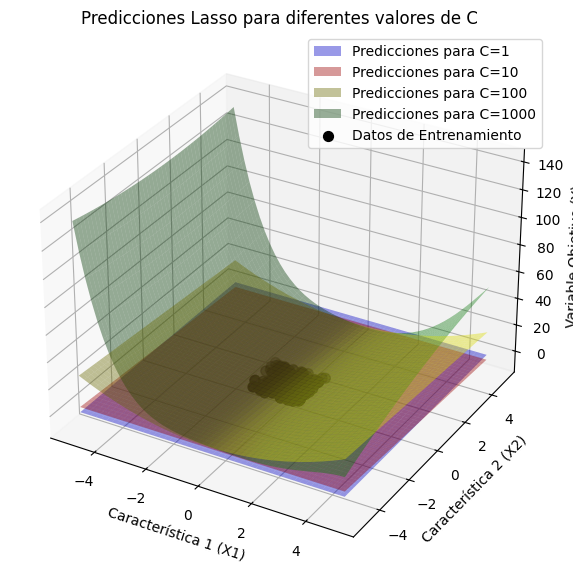

In [38]:
# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Definimos los colores para los diferentes modelos: C=1, C=10, C=100 y C=1000
colors = {1: 'blue', 10: 'red', 100: 'yellow', 1000: 'green'}

# Necesitamos crear una malla de puntos para graficar las superficies
X1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 50)
X2 = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 50)
X1, X2 = np.meshgrid(X1, X2)

# Ajustamos las predicciones al tamaño de la malla para su uso en plot_surface
from scipy.interpolate import griddata
# Creamos un array con las coordenadas de los puntos originales para la interpolación
points = np.column_stack((X_test[:, 0], X_test[:, 1]))

# Graficamos las predicciones de cada modelo como superficies
for C in [1, 10, 100, 1000]:
    # Interpolamos los datos al grid
    y_pred = griddata(points, predictions[f'Predicciones para C={C}'], (X1, X2), method='cubic')
    ax.plot_surface(X1, X2, y_pred, color=colors[C], label=f'Predicciones para C={C}', alpha=0.4)

# Graficamos los datos de entrenamiento originales como puntos para contraste
ax.scatter(X_train[:, 0], X_train[:, 1], Y_train, color='black', label='Datos de Entrenamiento', s=50)

#### ELEMENTOS DEL GRÁFICO

# Nombres de los ejes
ax.set_xlabel('Característica 1 (X1)')  # Eje X
ax.set_ylabel('Característica 2 (X2)')  # Eje Y
ax.set_zlabel('Variable Objetivo (Y)')  # Eje Z

# Título del gráfico
ax.set_title('Predicciones Lasso para diferentes valores de C')

# Agregar leyenda para clarificar el gráfico
ax.legend()

# Mostrar el gráfico
plt.show()


In [5]:
#APARTADOS B Y C, CON UN MODELO DE REGRESIÓN RIDGE

from sklearn.linear_model import Ridge

#Apartado (b): Características Polinómicas y Entrenamiento de Modelos Ridge

#Características Polinómicas

poly = PolynomialFeatures(degree=5)
X = data[['X1', 'X2']]  # Seleccionamos las características
X_poly = poly.fit_transform(X)  # Transformación polinómica

# Imprimimos las características polinómicas generadas
print(f"Características polinómicas:\n{poly.get_feature_names_out(['X1', 'X2'])}\n")
print(X_poly[:5])
print(f"Original columns: {X.shape[1]}, New columns: {X_poly.shape[1]}")


Características polinómicas:
['1' 'X1' 'X2' 'X1^2' 'X1 X2' 'X2^2' 'X1^3' 'X1^2 X2' 'X1 X2^2' 'X2^3'
 'X1^4' 'X1^3 X2' 'X1^2 X2^2' 'X1 X2^3' 'X2^4' 'X1^5' 'X1^4 X2'
 'X1^3 X2^2' 'X1^2 X2^3' 'X1 X2^4' 'X2^5']

[[ 1.00000000e+00  9.00000000e-01  5.90000000e-01  8.10000000e-01
   5.31000000e-01  3.48100000e-01  7.29000000e-01  4.77900000e-01
   3.13290000e-01  2.05379000e-01  6.56100000e-01  4.30110000e-01
   2.81961000e-01  1.84841100e-01  1.21173610e-01  5.90490000e-01
   3.87099000e-01  2.53764900e-01  1.66356990e-01  1.09056249e-01
   7.14924299e-02]
 [ 1.00000000e+00 -4.00000000e-01 -1.00000000e-01  1.60000000e-01
   4.00000000e-02  1.00000000e-02 -6.40000000e-02 -1.60000000e-02
  -4.00000000e-03 -1.00000000e-03  2.56000000e-02  6.40000000e-03
   1.60000000e-03  4.00000000e-04  1.00000000e-04 -1.02400000e-02
  -2.56000000e-03 -6.40000000e-04 -1.60000000e-04 -4.00000000e-05
  -1.00000000e-05]
 [ 1.00000000e+00  3.40000000e-01 -3.80000000e-01  1.15600000e-01
  -1.29200000e-01  1.4440000

In [6]:
# Entrenamiento del modelo Ridge con varios valores de C
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
alpha_values = [1/c for c in C_values]  # Conversión de C a alpha

# Entrenamos un modelo Ridge para cada valor de C
for alpha, C in zip(alpha_values, C_values):
    model = Ridge(alpha=alpha, max_iter=10000)
    model.fit(X_poly, data['Y'])  # Entrenamiento del modelo
    print(f"\nResultados para C = {C} (alpha = {alpha}):")
    for coef, feature in zip(model.coef_, poly.get_feature_names_out()):
        print(f"{feature}: {coef}")


Resultados para C = 0.0001 (alpha = 10000.0):
1: 0.0
X1: 0.0012136440994787512
X2: -0.007261148544714049
X1^2: 0.001908607582519028
X1 X2: -0.00018033923798465082
X2^2: 0.0003604544234104459
X1^3: 0.0009512416785914265
X1^2 X2: -0.0023170600910598594
X1 X2^2: 0.0007793308304207714
X2^3: -0.004534495121057838
X1^4: 0.0016570631807680336
X1^3 X2: -0.0004579947900212403
X1^2 X2^2: 0.0009025232989467479
X1 X2^3: -0.00017429489047369245
X2^4: 0.0003745896750441139
X1^5: 0.0007930985884880564
X1^4 X2: -0.00139213921324121
X1^3 X2^2: 0.0005933330805546962
X1^2 X2^3: -0.0015176151415810866
X1 X2^4: 0.0006579702348537915
X2^5: -0.003326316906697218

Resultados para C = 0.001 (alpha = 1000.0):
1: 0.0
X1: 0.009611403424257663
X2: -0.06502516452594617
X1^2: 0.018258663112487177
X1 X2: -0.001651861655808666
X2^2: 0.0032706621406082183
X1^3: 0.00768285070148735
X1^2 X2: -0.02018983341895002
X1 X2^2: 0.006174668329971944
X2^3: -0.04021743021180574
X1^4: 0.015843466392949195
X1^3 X2: -0.0041885281438

In [9]:
#Apartado (c): Generación Predicciones con Ridge

#CREACIÓN DE LA CUADÍCULA
import numpy as np

#Primero, creamos un conjunto de 50 valores entre -5 y 5. 
#Usamos el rango de -5 a 5 para cubrir los posibles valores de las características.
grid = np.linspace(-5, 5, 50)

X_test = [] 
# Creamos una lista vacía donde vamos a almacenar todas las combinaciones de los valores de las características.

#Generamos dos bucles: El primero toma un valor i del conjunto de datos grid. El segundo, toma un valor j.
for i in grid:
    for j in grid:
        X_test.append([i, j]) 
        #Cada par de valores (i, j), los colocamos juntos en una lista [i, j] y los añadimos a X_test usando append().

X_test = np.array(X_test)
#Convertimos la lista X_test en un arreglo de numpy usando np.array(), para poder hacer predicciones usando los valores de la lista.

#Veamos las primeras 5 filas de la cuadrícula
print(X_test[:5])

[[-5.         -5.        ]
 [-5.         -4.79591837]
 [-5.         -4.59183673]
 [-5.         -4.3877551 ]
 [-5.         -4.18367347]]


In [10]:
#GENERAR CARACTERISTICAS POLINOMICAS PARA LA CUADRICULA

# Generamos las características polinómicas para el conjunto X_test
poly = PolynomialFeatures(degree=5)
Xtest_poly = poly.fit_transform(X_test)

# Obtenemos los nombres de las características polinómicas generadas por PolynomialFeatures
feature_names = poly.get_feature_names_out(['X1', 'X2'])

# Creamos el DataFrame usando los nombres de las características polinómicas
Xtest_poly_df = pd.DataFrame(Xtest_poly, columns=feature_names)

# Mostramos las primeras filas del DataFrame resultante
print(Xtest_poly_df.head())

     1   X1        X2  X1^2      X1 X2       X2^2   X1^3     X1^2 X2  \
0  1.0 -5.0 -5.000000  25.0  25.000000  25.000000 -125.0 -125.000000   
1  1.0 -5.0 -4.795918  25.0  23.979592  23.000833 -125.0 -119.897959   
2  1.0 -5.0 -4.591837  25.0  22.959184  21.084965 -125.0 -114.795918   
3  1.0 -5.0 -4.387755  25.0  21.938776  19.252395 -125.0 -109.693878   
4  1.0 -5.0 -4.183673  25.0  20.918367  17.503124 -125.0 -104.591837   

      X1 X2^2        X2^3  ...     X1^3 X2   X1^2 X2^2     X1 X2^3  \
0 -125.000000 -125.000000  ...  625.000000  625.000000  625.000000   
1 -115.004165 -110.310117  ...  599.489796  575.020825  551.550587   
2 -105.424823  -96.818715  ...  573.979592  527.124115  484.093575   
3  -96.261974  -84.474794  ...  548.469388  481.309871  422.373968   
4  -87.515618  -73.227354  ...  522.959184  437.578092  366.136771   

         X2^4    X1^5      X1^4 X2    X1^3 X2^2    X1^2 X2^3      X1 X2^4  \
0  625.000000 -3125.0 -3125.000000 -3125.000000 -3125.000000 -3125.00

In [11]:
# PREDICCIONES

# Anteriormente, se generaron varios modelos, utilizando diferentes valores de C. 
# Para mantener la consistencia con el modelo Lasso, y así poder comparar los resultados
#Vamos a generar las predicciones para los modelos donde C=1, C=10, C=100 y C=1000

C_values = [1, 10, 100, 1000]

# Convertimos los valores de C a alpha
alpha_values = [1/c for c in C_values]

# Aquí almacenamos las predicciones
predictions = {}

# Obtenemos los nombres de las características polinómicas
feature_names = poly.get_feature_names_out(['X1', 'X2'])

# Convertimos X_poly a un DataFrame, usando los nombres de las características
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Creamos un modelo Ridge para cada valor de C
for alpha, C in zip(alpha_values, C_values):
    
    # Creamos el modelo Ridge
    model = Ridge(alpha=alpha, max_iter=10000)
    
    # Entrenamos cada modelo con las características polinómicas y la variable objetivo
    model.fit(X_poly_df, data['Y'])
    
    # Realizamos predicciones sobre el conjunto de prueba polinómico
    y_pred = model.predict(Xtest_poly_df)
    
    # Guardamos las predicciones
    predictions[f'Predicciones para C={C}'] = y_pred
    
    # Imprimimos algunas predicciones para ver los resultados
    print(f"\nPredicciones para C = {C} (alpha = {alpha}):")
    print(y_pred[:5])  # Mostramos las primeras 5 predicciones



Predicciones para C = 1 (alpha = 1.0):
[328.20825979 319.26662838 310.2788149  301.41782984 292.83254507]

Predicciones para C = 10 (alpha = 0.1):
[544.87584552 499.31924178 454.46211764 410.75473009 368.58702403]

Predicciones para C = 100 (alpha = 0.01):
[969.06510345 869.58466431 775.06695798 685.61838267 601.31325111]

Predicciones para C = 1000 (alpha = 0.001):
[1060.21537224  950.43819492  846.47355561  748.35111736  656.07510583]


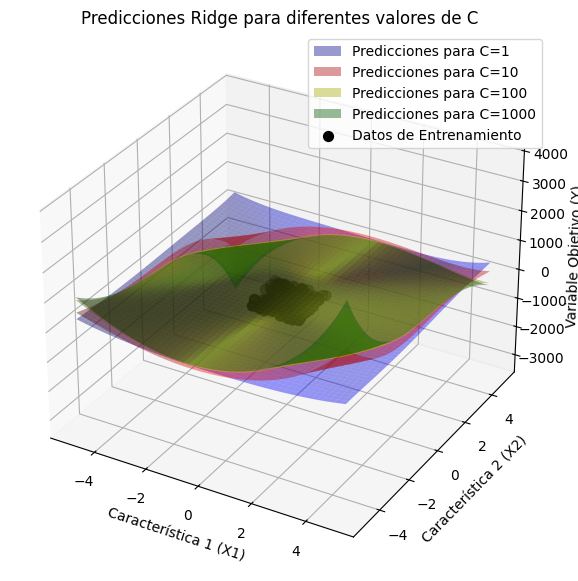

In [18]:
#GRÁFICA DE LAS PREDICCIONES DE RIDGE

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Definimos los colores para los diferentes modelos: C=1, C=10, C=100 y C=1000
colors = {1: 'blue', 10: 'red', 100: 'yellow', 1000: 'green'}

# Necesitamos crear una malla de puntos para graficar las superficies
X1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 50)
X2 = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 50)
X1, X2 = np.meshgrid(X1, X2)

# Ajustamos las predicciones al tamaño de la malla para su uso en plot_surface
from scipy.interpolate import griddata
# Creamos un array con las coordenadas de los puntos originales para la interpolación
points = np.column_stack((X_test[:, 0], X_test[:, 1]))

# Graficamos las predicciones de cada modelo como superficies
for C in [1, 10, 100, 1000]:
    # Interpolamos los datos al grid
    y_pred = griddata(points, predictions[f'Predicciones para C={C}'], (X1, X2), method='cubic')
    ax.plot_surface(X1, X2, y_pred, color=colors[C], label=f'Predicciones para C={C}', alpha=0.4)

# Graficamos los datos de entrenamiento originales como puntos para contraste
ax.scatter(X_train[:, 0], X_train[:, 1], Y_train, color='black', label='Datos de Entrenamiento', s=50)

#### ELEMENTOS DEL GRÁFICO

# Nombres de los ejes
ax.set_xlabel('Característica 1 (X1)')  # Eje X
ax.set_ylabel('Característica 2 (X2)')  # Eje Y
ax.set_zlabel('Variable Objetivo (Y)')  # Eje Z

# Título del gráfico
ax.set_title('Predicciones Ridge para diferentes valores de C')

# Agregar leyenda para clarificar el gráfico
ax.legend()

# Mostrar el gráfico
plt.show()